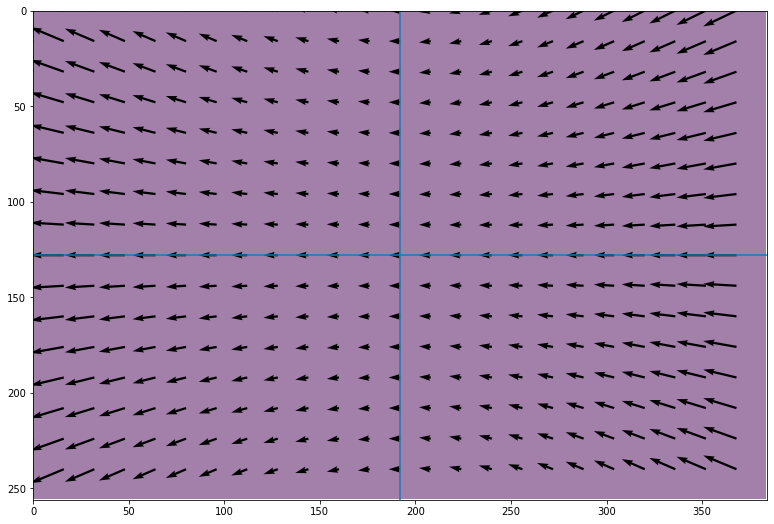

In [163]:
import numpy as np
import matplotlib.pyplot as plt


def get_wall_z_image(Z_val, fx, fy, cx, cy, szx, szy):
    Z = Z_val*np.ones((szy, szx), dtype=np.float32)
    return Z


def get_road_z_image(H_val, fx, fy, cx, cy, szx, szy):
    y = np.arange(szy).reshape(-1,1)*1.
    y = np.tile(y, (1, szx))
    Z = np.zeros((szy, szx), dtype=np.float32)
    Z[y > cy] = H_val*fy / (y[y>cy]-cy)
    Z[y <= cy] = np.NaN
    return Z


def plot_optical_flow(ax, Z, u, v, cx, cy, szx, szy, s=16, T = np.array([0,0,0]), W = np.array([0,0,0])):
    # Here is a function for plotting the optical flow. Feel free to modify this 
    # function to work well with your inputs, for example if your predictions are
    # in a different coordinate frame, etc.
    
    x, y = np.meshgrid(np.arange(szx), np.arange(szy))
    ax.imshow(Z, alpha=0.5, origin='upper')
    q = ax.quiver(x[::s,::s], y[::s,::s], u[::s,::s], -v[::s, ::s])
    # ax.quiverkey(q, X=0.5, Y=0.9, U=20, 
    #              label='Quiver key length = 20', labelpos='N')
    ax.axvline(cx)
    ax.axhline(cy)
    ax.set_xlim([0, szx])
    ax.set_ylim([szy, 0])




def calculate_view(x,y,f,Z,T,W):
    #Looking forward on a horizontal plane while driving on a flat road.

    tx = T[0]
    ty = T[1]
    tz = T[2]

    wx = W[0]
    wy = W[1]
    wz = W[2]
    u = ((tz * x - tx * f)/Z) - (wy * f) + (wz * y) + (wx * x * y / f) - (wy * x * x / f)
    v = ((tz * y - ty * f)/Z) + (wx * f) - (wz * x) - (wy * x * y / f) + (wx * y * y / f)
    

    return u,v


if __name__ == "__main__":
    # Focal length along X and Y axis. In class we assumed the same focal length 
    # for X and Y axis. but in general they could be different. We are denoting 
    # these by fx and fy, and assume that they are the same for the purpose of
    # this MP.
    fx = fy = 128.

    # Size of the image
    szy = 256
    szx = 384

    # Center of the image. We are going to assume that the principal point is at 
    # the center of the image.
    cx = 192
    cy = 128

    # Gets the image of a wall 2m in front of the camera.
    Z1 = get_wall_z_image(2., fx, fy, cx, cy, szx, szy)


    # Gets the image of the ground plane that is 3m below the camera.
    Z2 = get_road_z_image(3., fx, fy, cx, cy, szx, szy)

#     fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
#     ax1.imshow(Z1)
#     ax2.imshow(Z2)

    # Plotting function.
    f = plt.figure(figsize=(13.5,9))
    u = np.ones(Z1.shape)
    v = np.ones(Z1.shape)
    x, y = np.meshgrid(np.arange(szx), np.arange(szy))
    x = x - cx
    y = y - cy
    
    #q1 Looking forward on a horizontal plane while driving on a flat road.
    T = np.array([0,0,1])
    W = np.array([0,0,0])
    Z = Z2

    #q2 Sitting in a train and looking out over a flat field from a side window.okay
    T = np.array([1,0,0])
    W = np.array([0,0,0])
    Z = Z1

    #q3 Flying into a wall head-on.
    T = np.array([0,0,1])
    W = np.array([0,0,0])
    Z = Z1
    
    #q4 Flying into a wall but also translating horizontally, and vertically.
    T = np.array([0.5,0.5,1])
    W = np.array([0,0,0])
    Z = Z1
    
    #q5 Counter-clockwise rotating in front of a wall about the Y-axis.
    T = np.array([0,0,0])
    W = np.array([0,1,0])
    Z = Z1
    u,v = calculate_view(x,y,fx,Z,T,W)
    
    plot_optical_flow(f.gca(), Z, u, v, cx, cy, szx, szy, s=16)
    f.savefig('optical_flow_output.pdf', bbox_inches='tight')
